In [1]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

import src.label_hierarchy as label_maps

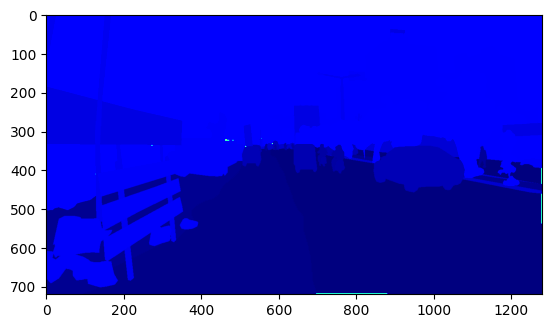

In [4]:
def generate_mask_from_json(json_path, label_map):
    # Load JSON
    with open(json_path, 'r') as f:
        data = json.load(f)

    height = data["imgHeight"]
    width = data["imgWidth"]

    # Create empty mask
    mask = np.zeros((height, width), dtype=np.uint8)
    mask.fill(255)

    for obj in data["objects"]:
        label = obj["label"]
        polygon = obj["polygon"]
        if label not in label_map:
            print(f"Label '{label}' not found in label map.")
            continue
        class_id = label_map[label]

        # Convert polygon to numpy int32 array
        pts = np.array(polygon, dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))

        # Draw filled polygon
        cv2.fillPoly(mask, [pts], color=class_id)

    return mask

# Example usage
mask = generate_mask_from_json("data/IDD_Segmentation/gtFine/train/5/002054_gtFine_polygons.json", label_map=label_maps.LEVEL1)

plt.imshow(mask, cmap='jet')